In [4]:
import sys  
sys.path.insert(0, './')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
%matplotlib inline

In [15]:
df = pd.read_csv('../tutorial/tutorial.csv', index_col='timestamp', delimiter=';')
df_pearls = df.loc[df['product']=='PEARLS'][['mid_price']].rename(columns={'mid_price': 'pearls'})
df_bananas = df.loc[df['product']=='BANANAS'][['mid_price']].rename(columns={'mid_price': 'bananas'})
df = pd.concat([df_pearls, df_bananas], axis=1)
df.columns = pd.MultiIndex.from_product([['mid_price'], df.columns.tolist()])
df

mid_price        
             pearls bananas
timestamp                  
0           10001.5  4949.0
100          9999.0  4947.5
200         10000.0  4948.0
300          9997.0  4948.5
400         10001.0  4949.0
...             ...     ...
199500       9997.0  4933.5
199600      10000.0  4933.5
199700      10003.0  4934.0
199800      10000.0  4934.0
199900      10001.5  4931.5

[2000 rows x 2 columns]

array([<Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>],
      dtype=object)

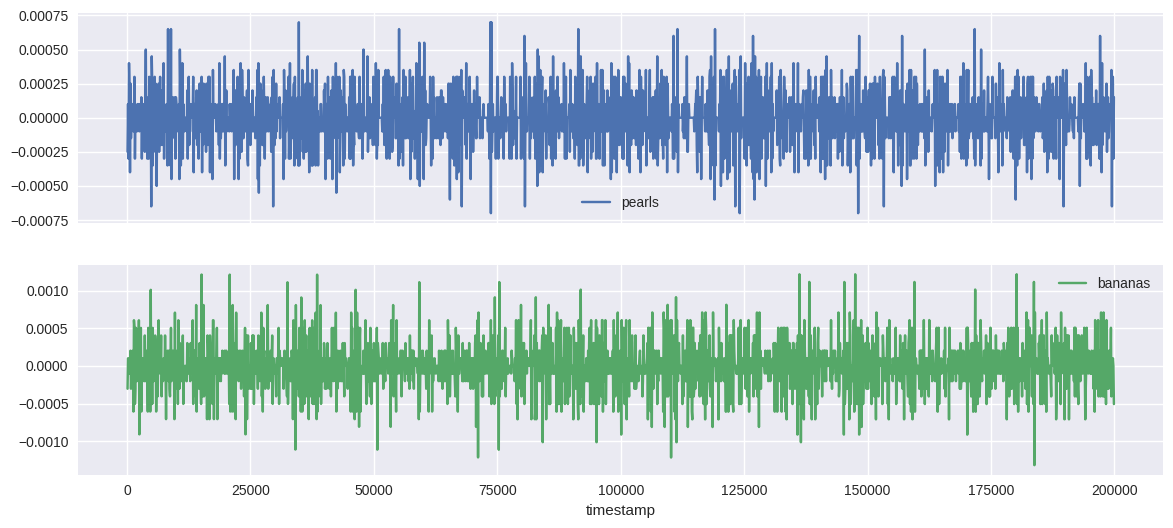

In [17]:
returns = np.log(df['mid_price']/ df['mid_price'].shift(1))
returns.dropna(inplace=True)
returns.plot(subplots=True, figsize=(14,6))

array([[<Axes: xlabel='pearls', ylabel='pearls'>,
        <Axes: xlabel='bananas', ylabel='pearls'>],
       [<Axes: xlabel='pearls', ylabel='bananas'>,
        <Axes: xlabel='bananas', ylabel='bananas'>]], dtype=object)

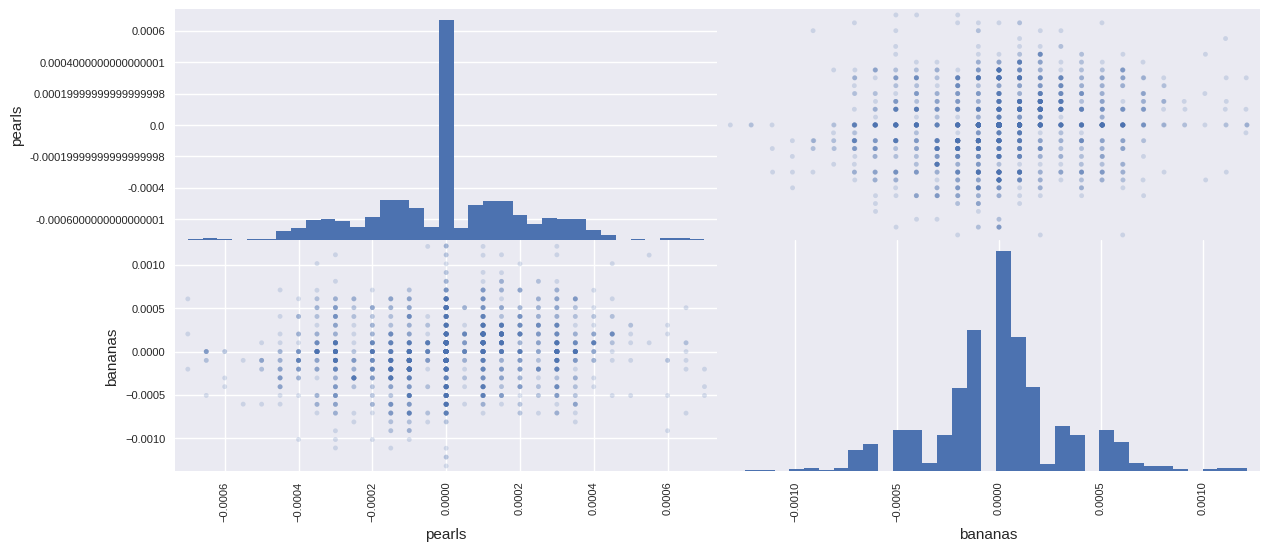

In [18]:
pd.plotting.scatter_matrix(returns, alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(14,6))

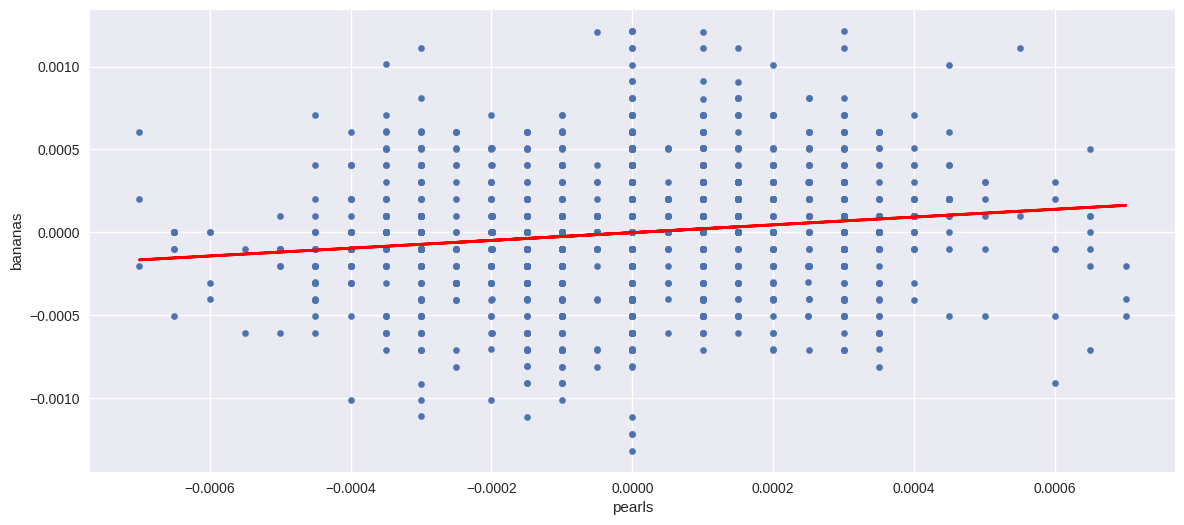

In [19]:
regression = np.polyfit(returns['pearls'], returns['bananas'], deg=1)

ax = returns.plot(kind='scatter', x= 'pearls', y='bananas', figsize=(14,6))
ax.plot(returns['pearls'], np.polyval(regression, returns['pearls']), 'r', lw=2)

In [20]:
returns.corr()

,pearls,bananas
pearls,1.000000,0.146637
bananas,0.146637,1.000000


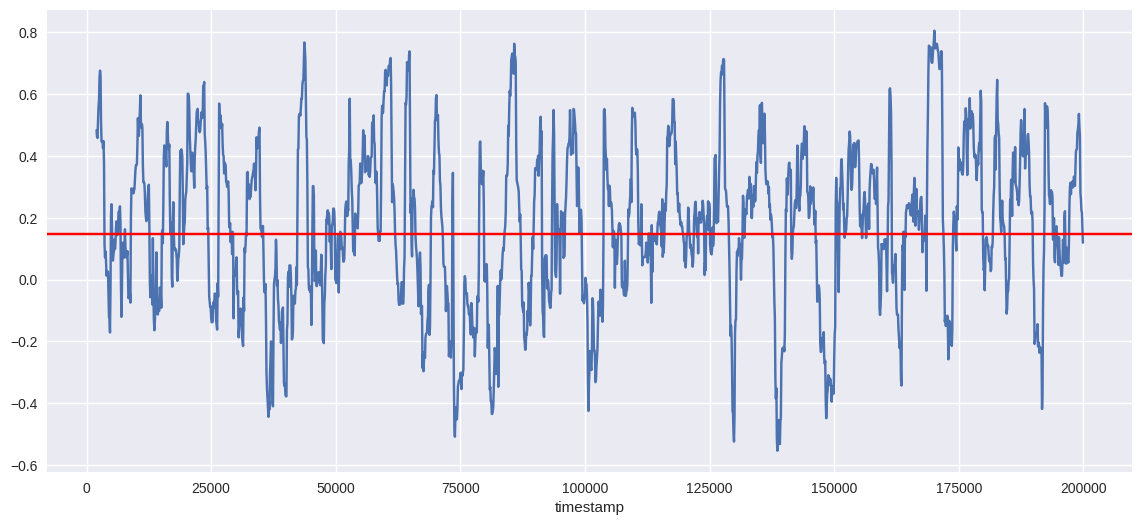

In [21]:
ax = returns['pearls'].rolling(window=20).corr(returns['bananas']).plot(figsize=(14,6))
ax.axhline(returns.corr().iloc[0,1], c='r')